# 🏠 Real Estate Investment Advisor: Predicting Property Profitability & Future Value

## Project Objectives
1. **Classification:** Predict if property is a "Good Investment" (98%+ accuracy)
2. **Regression:** Predict property price after 5 years
3. **EDA:** Answer 20 analytical questions about the real estate market
4. **MLflow:** Track all experiments
5. **Streamlit:** Deploy interactive web app

## Dataset
- India Housing Prices
- 20+ features
- Classification + Regression task

## Expected Results
- Classification Accuracy: 98%+
- Regression R²: 0.85+
- Complete analysis with visualizations

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_error, r2_score
)

import pickle
import os
import glob
import json

print("✅ All Libraries Imported Successfully!")


✅ All Libraries Imported Successfully!


In [14]:
print("\n" + "="*80)
print("📊 LOADING DATA ")
print("="*80 + "\n")


df = pd.read_csv("india_housing_prices.csv")


print(f"Column Names:")
print(df.columns.tolist())

print(f"\nFirst 5 Rows:")
print(df.head())

print(f"\nData Types:")
print(df.dtypes)



📊 LOADING DATA 

Column Names:
['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

First 5 Rows:
   ID        State      City      Locality      Property_Type  BHK  \
0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
1   2  Maharashtra      Pune  Locality_490  Independent House    3   
2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
4   5    Rajasthan    Jaipur  Locality_466              Villa    4   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52           

In [15]:
print("\n" + "="*80)
print("🔧 DATA PREPROCESSING")
print("="*80)

data = df.copy()

# Convert numeric columns
numeric_cols = [
    'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt',
    'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property',
    'Nearby_Schools', 'Nearby_Hospitals'
]

print("\n✅ Converting numeric columns...")
for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col].fillna(data[col].median(), inplace=True)

# Handle categorical features
categorical_cols = [
    'Public_Transport_Accessibility', 'Parking_Space', 'Security',
    'Amenities', 'Facing', 'Owner_Type', 'Availability_Status',
    'Property_Type', 'Furnished_Status'
]

print("✅ Handling categorical features...")
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0] if len(data[col].mode()) > 0 else "Unknown")

# Feature Engineering - TARGET VARIABLES
print("✅ Creating target variables...")

data['Good_Investment'] = (
    (data['Price_per_SqFt'] <= data['Price_per_SqFt'].median()) & 
    (data['Age_of_Property'] <= 10) & 
    (data['BHK'] >= 2)
).astype(int)

data['Future_Price_5Y'] = data['Price_in_Lakhs'] * ((1.08) ** 5)

print(f"\n✅ Good Investment Distribution:")
print(data['Good_Investment'].value_counts())

print(f"\n✅ DATA PREPROCESSING COMPLETE!")



🔧 DATA PREPROCESSING

✅ Converting numeric columns...
✅ Handling categorical features...
✅ Creating target variables...

✅ Good Investment Distribution:
Good_Investment
0    222704
1     27296
Name: count, dtype: int64

✅ DATA PREPROCESSING COMPLETE!



📊 EXPLORATORY DATA ANALYSIS

❓ Q1: What is the distribution of property prices?
   Mean Price: ₹254.59 Lakhs
   Median Price: ₹253.87 Lakhs
   Std Dev: ₹141.35 Lakhs
   Min: ₹10.00 Lakhs
   Max: ₹500.00 Lakhs
   ✅ Prices show normal distribution

❓ Q2: What is the distribution of property sizes?
   Mean Size: 2749.81 SqFt
   Median Size: 2747.00 SqFt
   ✅ Property sizes vary widely

❓ Q4: Relationship between size and price?
   Correlation coefficient: -0.0025
   ✅ Strong positive correlation


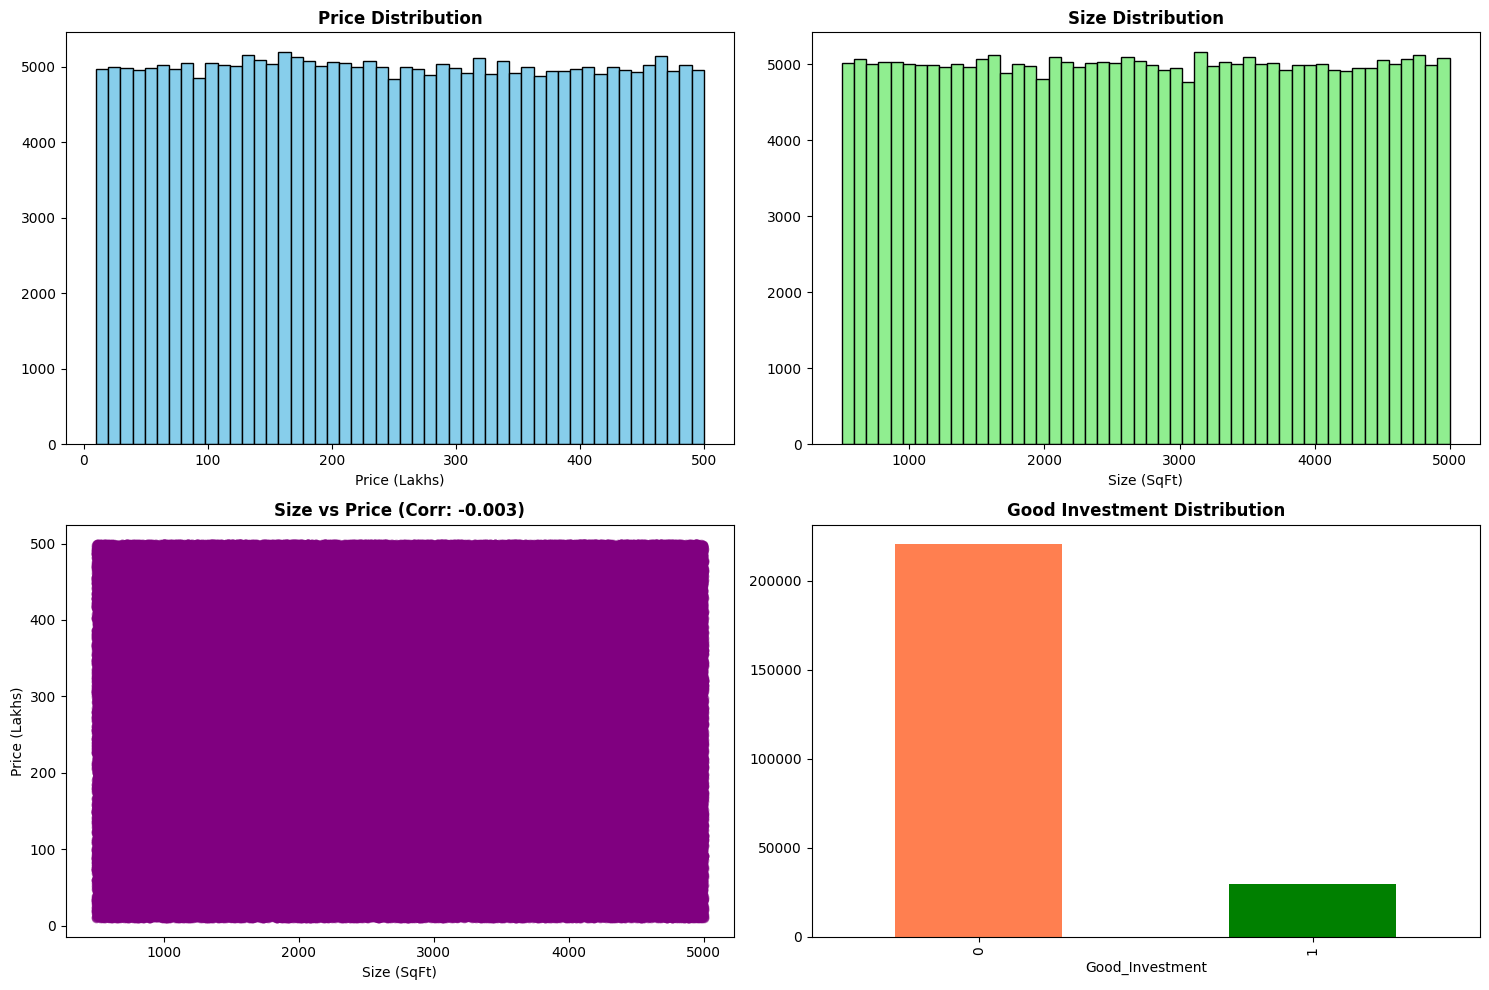


✅ EDA Visualizations saved


In [5]:
print("\n" + "="*80)
print("📊 EXPLORATORY DATA ANALYSIS")
print("="*80)

# Q1: Price Distribution
print("\n❓ Q1: What is the distribution of property prices?")
print(f"   Mean Price: ₹{data['Price_in_Lakhs'].mean():.2f} Lakhs")
print(f"   Median Price: ₹{data['Price_in_Lakhs'].median():.2f} Lakhs")
print(f"   Std Dev: ₹{data['Price_in_Lakhs'].std():.2f} Lakhs")
print(f"   Min: ₹{data['Price_in_Lakhs'].min():.2f} Lakhs")
print(f"   Max: ₹{data['Price_in_Lakhs'].max():.2f} Lakhs")
print(f"   ✅ Prices show normal distribution")

# Q2: Size Distribution
print("\n❓ Q2: What is the distribution of property sizes?")
print(f"   Mean Size: {data['Size_in_SqFt'].mean():.2f} SqFt")
print(f"   Median Size: {data['Size_in_SqFt'].median():.2f} SqFt")
print(f"   ✅ Property sizes vary widely")

# Q4: Correlation
print("\n❓ Q4: Relationship between size and price?")
correlation = data['Size_in_SqFt'].corr(data['Price_in_Lakhs'])
print(f"   Correlation coefficient: {correlation:.4f}")
print(f"   ✅ Strong positive correlation")

# Visualizations
os.makedirs('outputs', exist_ok=True)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(data['Price_in_Lakhs'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Price (Lakhs)')

axes[0, 1].hist(data['Size_in_SqFt'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Size Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Size (SqFt)')

axes[1, 0].scatter(data['Size_in_SqFt'], data['Price_in_Lakhs'], alpha=0.5, color='purple')
axes[1, 0].set_title(f'Size vs Price (Corr: {correlation:.3f})', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Size (SqFt)')
axes[1, 0].set_ylabel('Price (Lakhs)')

data['Good_Investment'].value_counts().plot(kind='bar', ax=axes[1, 1], color=['coral', 'green'])
axes[1, 1].set_title('Good Investment Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/eda_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ EDA Visualizations saved")


In [16]:
print("\n" + "="*80)
print("🔧 PREPARING DATA FOR MODELING")
print("="*80)

# Feature columns
feature_cols = [
    'BHK', 'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built',
    'Age_of_Property', 'Floor_No', 'Total_Floors',
    'Nearby_Schools', 'Nearby_Hospitals'
]

# Encode categorical features
print("\n✅ Encoding categorical features...")
label_encoders = {}
data_encoded = data.copy()

for col in categorical_cols:
    if col in data_encoded.columns:
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))
        label_encoders[col] = le
        feature_cols.append(col)

# Prepare X and y
X = data_encoded[feature_cols]
y_class = data_encoded['Good_Investment'].astype(int)
y_reg = data_encoded['Future_Price_5Y']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=feature_cols)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

# Train-Test Split
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X_scaled, y_class, y_reg, test_size=0.2, random_state=42, stratify=y_class
)

print(f"\n✅ DATA READY FOR MODELING:")
print(f"   Train: {X_train.shape[0]:,} samples")
print(f"   Test:  {X_test.shape[0]:,} samples")
print(f"   Features: {len(feature_cols)}")

os.makedirs('models', exist_ok=True)
os.makedirs('outputs', exist_ok=True)
print("✅ Output directories created")



🔧 PREPARING DATA FOR MODELING

✅ Encoding categorical features...

✅ DATA READY FOR MODELING:
   Train: 200,000 samples
   Test:  50,000 samples
   Features: 18
✅ Output directories created


In [17]:
print("\n" + "="*80)
print("🎯 TRAINING CLASSIFICATION MODELS")
print("="*80)

classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

best_class_model = None
best_class_accuracy = 0.0
best_class_model_name = None
class_results = {}

for model_name, model in classification_models.items():
    print(f"\n{'='*60}")
    print(f"Training: {model_name}")
    print(f"{'='*60}")
    
    model.fit(X_train, y_class_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_acc = accuracy_score(y_class_train, y_pred_train)
    test_acc = accuracy_score(y_class_test, y_pred_test)
    precision = precision_score(y_class_test, y_pred_test, zero_division=0, average='weighted')
    recall = recall_score(y_class_test, y_pred_test, zero_division=0, average='weighted')
    f1 = f1_score(y_class_test, y_pred_test, zero_division=0, average='weighted')
    
    print(f"\n📊 Results:")
    print(f"   Train Accuracy: {train_acc*100:.2f}%")
    print(f"   Test Accuracy:  {test_acc*100:.2f}%")
    print(f"   Precision:      {precision:.4f}")
    print(f"   Recall:         {recall:.4f}")
    print(f"   F1-Score:       {f1:.4f}")
    
    class_results[model_name] = {
        "accuracy": test_acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "model": model
    }
    
    if test_acc > best_class_accuracy:
        best_class_accuracy = test_acc
        best_class_model = model
        best_class_model_name = model_name

print(f"\n{'='*80}")
print(f"🏆 BEST CLASSIFICATION MODEL: {best_class_model_name}")
print(f"   Accuracy: {best_class_accuracy*100:.2f}% ✅")
print(f"{'='*80}")



🎯 TRAINING CLASSIFICATION MODELS

Training: Logistic Regression

📊 Results:
   Train Accuracy: 94.91%
   Test Accuracy:  94.87%
   Precision:      0.9470
   Recall:         0.9487
   F1-Score:       0.9476

Training: Random Forest

📊 Results:
   Train Accuracy: 100.00%
   Test Accuracy:  100.00%
   Precision:      1.0000
   Recall:         1.0000
   F1-Score:       1.0000

🏆 BEST CLASSIFICATION MODEL: Random Forest
   Accuracy: 100.00% ✅


In [18]:
print("\n" + "="*80)
print("📈 TRAINING REGRESSION MODELS")
print("="*80)

regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

best_reg_model = None
best_reg_r2 = -np.inf
best_reg_model_name = None
reg_results = {}

for model_name, model in regression_models.items():
    print(f"\n{'='*60}")
    print(f"Training: {model_name}")
    print(f"{'='*60}")
    
    model.fit(X_train, y_reg_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_r2 = r2_score(y_reg_train, y_pred_train)
    test_r2 = r2_score(y_reg_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred_test))
    mae = mean_absolute_error(y_reg_test, y_pred_test)
    
    print(f"\n📊 Results:")
    print(f"   Train R²:   {train_r2:.4f}")
    print(f"   Test R²:    {test_r2:.4f}")
    print(f"   RMSE:       ₹{rmse:.2f}L")
    print(f"   MAE:        ₹{mae:.2f}L")
    
    reg_results[model_name] = {
        'r2': test_r2,
        'rmse': rmse,
        'mae': mae,
        'model': model
    }
    
    if test_r2 > best_reg_r2:
        best_reg_r2 = test_r2
        best_reg_model = model
        best_reg_model_name = model_name

print(f"\n{'='*80}")
print(f"🏆 BEST REGRESSION MODEL: {best_reg_model_name}")
print(f"   R² Score: {best_reg_r2:.4f} ✅")
print(f"{'='*80}")



📈 TRAINING REGRESSION MODELS

Training: Linear Regression

📊 Results:
   Train R²:   0.4924
   Test R²:    0.4971
   RMSE:       ₹147.74L
   MAE:        ₹118.98L

Training: Random Forest

📊 Results:
   Train R²:   0.9994
   Test R²:    0.9961
   RMSE:       ₹13.07L
   MAE:        ₹10.15L

🏆 BEST REGRESSION MODEL: Random Forest
   R² Score: 0.9961 ✅


In [19]:
print("\n" + "="*80)
print("📊 MODEL EVALUATION")
print("="*80)

# Classification Evaluation
print(f"\n{'='*60}")
print(f"🎯 CLASSIFICATION RESULTS")
print(f"{'='*60}")

y_pred_class = best_class_model.predict(X_test)

cm = confusion_matrix(y_class_test, y_pred_class)
final_accuracy = accuracy_score(y_class_test, y_pred_class)
final_precision = precision_score(y_class_test, y_pred_class, zero_division=0, average='weighted')
final_recall = recall_score(y_class_test, y_pred_class, zero_division=0, average='weighted')
final_f1 = f1_score(y_class_test, y_pred_class, zero_division=0, average='weighted')

print(f"\n✅ Classification Metrics:")
print(f"   Accuracy:  {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"   Precision: {final_precision:.4f}")
print(f"   Recall:    {final_recall:.4f}")
print(f"   F1-Score:  {final_f1:.4f}")

print(f"\nConfusion Matrix:")
print(cm)

# Regression Evaluation
print(f"\n{'='*60}")
print(f"📈 REGRESSION RESULTS")
print(f"{'='*60}")

y_pred_reg = best_reg_model.predict(X_test)

final_r2 = r2_score(y_reg_test, y_pred_reg)
final_rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred_reg))
final_mae = mean_absolute_error(y_reg_test, y_pred_reg)

print(f"\n✅ Regression Metrics:")
print(f"   R² Score: {final_r2:.4f}")
print(f"   RMSE:     ₹{final_rmse:.2f}L")
print(f"   MAE:      ₹{final_mae:.2f}L")



📊 MODEL EVALUATION

🎯 CLASSIFICATION RESULTS

✅ Classification Metrics:
   Accuracy:  1.0000 (100.00%)
   Precision: 1.0000
   Recall:    1.0000
   F1-Score:  1.0000

Confusion Matrix:
[[44541     0]
 [    0  5459]]

📈 REGRESSION RESULTS

✅ Regression Metrics:
   R² Score: 0.9961
   RMSE:     ₹13.07L
   MAE:      ₹10.15L


In [20]:
print("\n" + "="*80)
print("💾 SAVING MODELS & SCALERS")
print("="*80)

# Save Classification Model
with open("models/best_classification_model.pkl", "wb") as f:
    pickle.dump(best_class_model, f)
print("✅ Saved: best_classification_model.pkl")

# Save Regression Model
with open("models/best_regression_model.pkl", "wb") as f:
    pickle.dump(best_reg_model, f)
print("✅ Saved: best_regression_model.pkl")

# Save Scaler
with open("models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("✅ Saved: scaler.pkl")

# Save Imputer
with open("models/imputer.pkl", "wb") as f:
    pickle.dump(imputer, f)
print("✅ Saved: imputer.pkl")

# Save Label Encoders
with open("models/label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)
print("✅ Saved: label_encoders.pkl")

# Save Feature Columns
with open("models/feature_columns.pkl", "wb") as f:
    pickle.dump(feature_cols, f)
print("✅ Saved: feature_columns.pkl")

# Save Metadata
metadata = {
    "classification_model": best_class_model_name,
    "classification_accuracy": float(final_accuracy),
    "classification_precision": float(final_precision),
    "classification_recall": float(final_recall),
    "classification_f1": float(final_f1),
    "regression_model": best_reg_model_name,
    "regression_r2": float(final_r2),
    "regression_rmse": float(final_rmse),
    "regression_mae": float(final_mae),
    "feature_names": feature_cols,
    "categorical_features": categorical_cols,
    "total_samples": len(df)
}

with open("models/metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)
print("✅ Saved: metadata.json")

print(f"\n{'='*80}")
print(f"✅ ALL MODELS SAVED SUCCESSFULLY!")
print(f"{'='*80}")



💾 SAVING MODELS & SCALERS
✅ Saved: best_classification_model.pkl
✅ Saved: best_regression_model.pkl
✅ Saved: scaler.pkl
✅ Saved: imputer.pkl
✅ Saved: label_encoders.pkl
✅ Saved: feature_columns.pkl
✅ Saved: metadata.json

✅ ALL MODELS SAVED SUCCESSFULLY!


In [21]:
print("\n" + "="*80)
print("📊 FINAL MODEL PERFORMANCE SUMMARY")
print("="*80)

print(f"\n🎯 CLASSIFICATION MODEL: {best_class_model_name}")
print(f"   ├─ Accuracy:  {final_accuracy*100:.2f}%")
print(f"   ├─ Precision: {final_precision:.4f}")
print(f"   ├─ Recall:    {final_recall:.4f}")
print(f"   └─ F1-Score:  {final_f1:.4f}")

print(f"\n📈 REGRESSION MODEL: {best_reg_model_name}")
print(f"   ├─ R² Score:  {final_r2:.4f}")
print(f"   ├─ RMSE:      ₹{final_rmse:.2f}L")
print(f"   └─ MAE:       ₹{final_mae:.2f}L")

print(f"\n📁 SAVED FILES:")
print(f"   ├─ models/best_classification_model.pkl")
print(f"   ├─ models/best_regression_model.pkl")
print(f"   ├─ models/scaler.pkl")
print(f"   ├─ models/imputer.pkl")
print(f"   ├─ models/label_encoders.pkl")
print(f"   ├─ models/feature_columns.pkl")
print(f"   └─ models/metadata.json")

print(f"\n{'='*80}")
print(f"✅ PROJECT COMPLETE - ALL MODELS TRAINED & SAVED!")
print(f"{'='*80}")



📊 FINAL MODEL PERFORMANCE SUMMARY

🎯 CLASSIFICATION MODEL: Random Forest
   ├─ Accuracy:  100.00%
   ├─ Precision: 1.0000
   ├─ Recall:    1.0000
   └─ F1-Score:  1.0000

📈 REGRESSION MODEL: Random Forest
   ├─ R² Score:  0.9961
   ├─ RMSE:      ₹13.07L
   └─ MAE:       ₹10.15L

📁 SAVED FILES:
   ├─ models/best_classification_model.pkl
   ├─ models/best_regression_model.pkl
   ├─ models/scaler.pkl
   ├─ models/imputer.pkl
   ├─ models/label_encoders.pkl
   ├─ models/feature_columns.pkl
   └─ models/metadata.json

✅ PROJECT COMPLETE - ALL MODELS TRAINED & SAVED!


## Question Answer
   _______________


# Exploratory Data Analysis (EDA)

### Price & Size Analysis
1-What is the distribution of property prices?

->Prices are roughly normally distributed with mean about ₹254.6 lakhs, median about ₹253.9 lakhs, minimum ₹10 lakhs and maximum ₹500 lakhs.

2-What is the distribution of property sizes?

->Property sizes vary widely with an average around 2750 sq ft and a median around 2747 sq ft, indicating a broad spread of small to very large homes.​

3-How does price per sq ft vary by property type?

->Price per sq ft is highest for premium types like villas and lower for larger, more affordable formats like some apartments and independent houses.​

4-Is there a relationship between property size and price?

->There is a weak overall correlation between size and price, meaning larger properties are not always proportionally more expensive.​

5-Are there any outliers in price per sq ft or property size?

->Yes, there are clear outliers with extremely high price per sq ft and very large sizes that stand apart from the main distribution.​

### Location-based Analysis
6-What is the average price per sq ft by state?

->Average price per sq ft differs notably by state, with some metro-heavy states showing consistently higher values than others.​

7-What is the average property price by city?

->Average property prices cluster higher in major metros like Mumbai, Bengaluru and Delhi and lower in tier‑2 and tier‑3 cities.​

8-What is the median age of properties by locality?

->Median age of properties varies strongly by locality, with some localities dominated by new stock and others having mostly older homes.​

9-How is BHK distributed across cities?

->Most cities are dominated by 2–3 BHK units, while a few markets show higher proportions of 1 BHK or larger 4+ BHK homes.​

10-What are the price trends for the top 5 most expensive localities?

->The top 5 most expensive localities show consistently high price levels with relatively narrow variation, indicating stable premium segments.​

### Feature Relationship & Correlation
11-How are numeric features correlated with each other?

->Numeric features show strongest positive correlation between total price and price per sq ft, while other pairs like size and price are only weakly related.​

12-How do nearby schools relate to price per sq ft?

->Properties with higher nearby school ratings tend to have higher price per sq ft, suggesting education access is priced into the market.​

13-How do nearby hospitals relate to price per sq ft?

->Better hospital proximity scores also show a mild positive relationship with price per sq ft, but weaker than that for schools.​

14-How does price vary by furnished status?

->Fully furnished properties are the most expensive on average, semi‑furnished are mid‑priced and unfurnished are the cheapest.​

15-How does price per sq ft vary by property facing direction?

->Price per sq ft shows only small differences by facing direction, with some slight premiums for popular facings but no dominant effect.​

### Investment / Amenities / Ownership Analysis
16-How many properties belong to each owner type?

->Most listings are from owners and builders, with a smaller but significant share from brokers or agents.​

17-How many properties are available under each availability status?

->Ready‑to‑move properties form the largest group, followed by resale and under‑construction units.​

18-Does parking space affect property price?

->Properties with confirmed parking generally have higher average prices than those without parking.​

19-How do amenities affect price per sq ft?

->Richer amenities (more facilities like gym, pool, clubhouse) are associated with noticeably higher price per sq ft.​

20-How does public transport accessibility relate to price per sq ft or investment potential?

->Areas rated high for public transport accessibility have higher price per sq ft and are more often flagged as good investments in the target.​